In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
school = pd.read_csv('위해지표_전처리_출입금지(200m).csv')
school.head(10)
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   학교명                 320 non-null    object 
 1   학교코드                320 non-null    object 
 2   지역                  320 non-null    object 
 3   법정동코드               320 non-null    int64  
 4   위도                  320 non-null    float64
 5   경도                  320 non-null    float64
 6   개최횟수                320 non-null    int64  
 7   심의건수                320 non-null    int64  
 8   학교장의 자체해결건수         320 non-null    int64  
 9   피해학생수               320 non-null    int64  
 10  피해학생_보호조치건수         320 non-null    int64  
 11  가해학생수               320 non-null    int64  
 12  선도·교육
조치건수          320 non-null    int64  
 13  신체폭력                320 non-null    int64  
 14  언어폭력                320 non-null    int64  
 15  금품갈취                320 non-null    int64  
 16  강요      

In [ ]:
school_info = school[['학교코드','학교명','지역','법정동코드','위도','경도']]
df = school.iloc[:,6:]
labels= np.array(school['학교코드'])

In [ ]:
# 상관분석

df.corr()

,개최횟수,심의건수,학교장의 자체해결건수,피해학생수,피해학생_보호조치건수,가해학생수,선도·교육\n조치건수,신체폭력,언어폭력,금품갈취,강요,따돌림,성폭력,사이버폭력,기타,학교폭력유형건수_합계,200미터내_청소년출입금지업소개수
개최횟수,1.000000,0.657802,0.361863,0.558343,0.416174,0.535145,0.543969,0.597475,0.358901,0.198729,0.224753,0.191970,0.328218,0.236426,0.038156,0.613103,-0.010517
심의건수,0.657802,1.000000,0.545479,0.714648,0.550975,0.710222,0.672056,0.725236,0.493437,0.245761,0.394138,0.336648,0.445430,0.358849,0.103229,0.816773,-0.019904
학교장의 자체해결건수,0.361863,0.545479,1.000000,0.468200,0.379631,0.401913,0.375402,0.444303,0.314859,0.168255,0.455615,0.333571,0.232731,0.225357,0.064213,0.541419,-0.015814
피해학생수,0.558343,0.714648,0.468200,1.000000,0.801331,0.710578,0.670935,0.590542,0.413154,0.251098,0.478213,0.351087,0.445020,0.395398,0.094197,0.736382,-0.064370
피해학생_보호조치건수,0.416174,0.550975,0.379631,0.801331,1.000000,0.571813,0.583642,0.481926,0.394817,0.205837,0.418531,0.416336,0.359587,0.283404,0.113385,0.635212,-0.054803
가해학생수,0.535145,0.710222,0.401913,0.710578,0.571813,1.000000,0.884803,0.663406,0.505229,0.250123,0.319188,0.294078,0.390969,0.276046,0.098494,0.750871,-0.030659
선도·교육\n조치건수,0.543969,0.672056,0.375402,0.670935,0.583642,0.884803,1.000000,0.676578,0.507559,0.294954,0.301998,0.240097,0.432791,0.257744,0.081542,0.759752,-0.014678
신체폭력,0.597475,0.725236,0.444303,0.590542,0.481926,0.663406,0.676578,1.000000,0.453201,0.429416,0.236045,0.123324,0.306680,0.127943,-0.001797,0.853334,-0.034809
언어폭력,0.358901,0.493437,0.314859,0.413154,0.394817,0.505229,0.507559,0.453201,1.000000,0.122855,0.270585,0.184536,0.155812,0.111663,-0.005535,0.695545,-0.018390
금품갈취,0.198729,0.245761,0.168255,0.251098,0.205837,0.250123,0.294954,0.429416,0.122855,1.000000,0.250517,0.059202,0.149296,0.047487,0.038735,0.462641,-0.001083


In [ ]:
# feature 선정

df = df[['학교폭력유형건수_합계','200미터내_청소년출입금지업소개수','개최횟수','심의건수','피해학생수','가해학생수','신체폭력']]

## K-Medoids

In [ ]:
import numpy as np
import kmedoids
from sklearn_extra.cluster import KMedoids

In [ ]:
# 표준화

sd = StandardScaler()
df_sd = pd.DataFrame(sd.fit_transform(df))
df_sd.index = labels

In [ ]:
# silhouette_score : 군집타당성 점수 = 1에 가까울수록 군집이 잘 이루어짐

from sklearn.metrics import silhouette_score

k_range = range(2, 20)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=2021)
    kmedoids.fit(df_sd)
    clusters = kmedoids.predict(df_sd)
    
    score = silhouette_score(df_sd, clusters)
    print('k: ', k, 'score: ', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n: ', best_n, 'best score: ', best_silhouette_score)

k:  2 score:  0.38028039333190355
k:  3 score:  0.2879600883794556
k:  4 score:  0.1951251326586429
k:  5 score:  0.1595501041442502
k:  6 score:  0.2052302701372956
k:  7 score:  0.15096759416084377
k:  8 score:  0.10311983505524136
k:  9 score:  0.091199946016192
k:  10 score:  0.10310438909741666
k:  11 score:  0.12907880016827938
k:  12 score:  0.11277138882064937
k:  13 score:  0.12440276760615095
k:  14 score:  0.13024830006735977
k:  15 score:  0.12745161999408391
k:  16 score:  0.12299681344245758
k:  17 score:  0.12299681344245758
k:  18 score:  0.12299681344245758
k:  19 score:  0.12299681344245758
best n:  2 best score:  0.38028039333190355


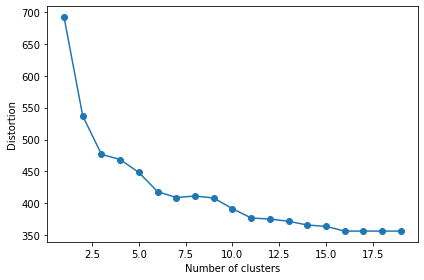

In [ ]:
# elbow method

dist =[]
for i in range(1,20):
    k = KMedoids(n_clusters=i, random_state=2021)
    k.fit(df_sd)
    dist.append(k.inertia_)


plt.plot(range(1,20), dist, marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [ ]:
n_clusters = range(2,10)
k_medoids = [KMedoids(n_clusters=i) for i in n_clusters]
k_medoids = [k_medoid.fit(df_sd) for k_medoid in k_medoids]

In [ ]:
df_sd_arr = df_sd.values

kmedoids = KMedoids(n_clusters=3, random_state=2021).fit(df_sd_arr)
kmedoids.cluster_centers_

array([[-0.67869212, -0.13518758, -0.51346595, -0.70203006, -0.55164174,
        -0.61224692, -0.74829002],
       [ 0.97557376, -0.59540063,  1.47214255,  1.378059  ,  1.19120381,
         1.04008211,  1.95230555],
       [ 0.26660267, -0.13518758, -0.01706382,  0.48659226,  0.19529207,
         0.3319411 ,  0.1519085 ]])

In [ ]:
# cluster label
df_sd['cluster'] = kmedoids.labels_
df_sd

,0,1,2,3,4,5,6,cluster
S010000373,-0.915016,-0.135188,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0
S010000375,1.448221,-0.595401,-0.513466,1.972370,0.444270,-0.612247,2.402405,1
S010000376,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0
S000003540,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0
S010000581,0.266603,-0.135188,0.975740,0.486592,0.195292,1.040082,0.602008,2
...,...,...,...,...,...,...,...,...
S010000436,-0.206045,0.325025,1.472143,-0.404874,-0.302664,-0.376200,-0.298191,2
S010000585,-0.442368,-0.595401,-0.513466,-0.404874,0.693248,-0.376200,-0.748290,0
S010005523,-0.206045,-0.595401,-0.513466,0.189437,0.444270,-0.612247,0.151909,2
S010000592,5.938371,0.094919,1.472143,1.080903,0.942226,1.748223,6.903397,1


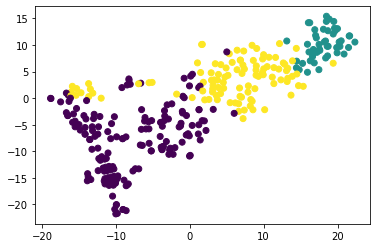

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(df_sd.iloc[:,:7])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmedoids.labels_)

plt.show()